In [1]:
from itertools import chain
import engineer_features
import bayes_linear_module

import warnings; warnings.simplefilter('ignore')

In [2]:
path = '../data/sneaker_transactions.csv'

In [3]:
data = engineer_features.make_data(path, 7, 7)

In [4]:
lin_reg_normal = """
    /* Spec for robust linear regression model */
    data {                                 
        int<lower=0> N;                              // count of observations
        int<lower=0> K;                              // count of features
        matrix[N, K] X;                              // feature matrix
        real y[N];                                   // target
    }
    parameters {
        real alpha;                                  // constant
        vector[K] beta;                              // feature coefficients
        real<lower=0> sigma;
    }
    model { 
        alpha ~ normal(0,3);                         // prior
        beta ~ normal(0,3);                          // prior
        y ~ normal(alpha + X * beta, sigma);         // likelihood
    }
    generated quantities {}
    """

In [5]:
pl = bayes_linear_module.ProbabilisticLinear()

In [6]:
train_features, train_labels, test_features, test_labels = pl.input_data(data, train_pct=0.8)

In [7]:
fit = pl.train(train_features, train_labels, lin_reg_normal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0267fb8ebed8951f1738ef582672686f NOW.


Time to fit model 96.75086903572083 seconds.


In [8]:
pl.diagnose(fit)

280 of 3000 iterations saturated the maximum tree depth of 10 (9.333333333333334%)
  Run again with max_depth set to a larger value to avoid saturation
None
E-BFMI indicated no pathological behavior
None
0.0 of 3000 iterations ended with a divergence (0.0%)
None


In [9]:
pl.evaluate(fit, test_features, test_labels)

Mean Absolute Percentage Error - Baseline: 20.0
Mean Absolute Percentage Error - Bayes: 16.0


Posterior distribution figure saved for all variables.
Posterior distribution figure saved for all variables.


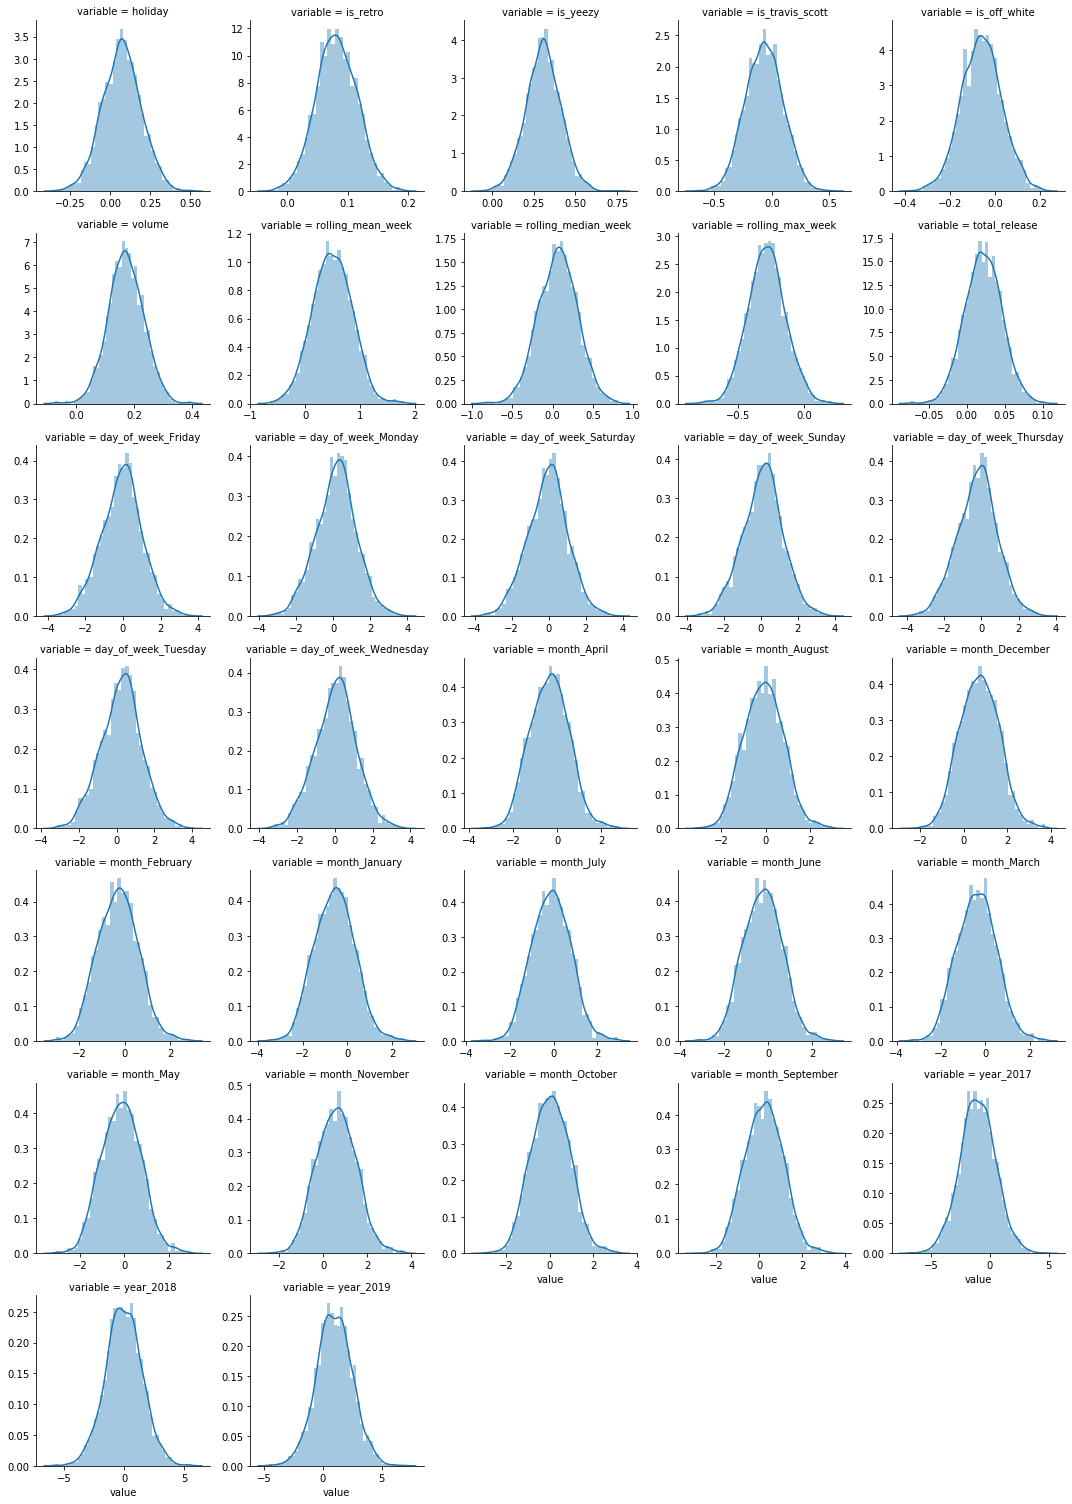

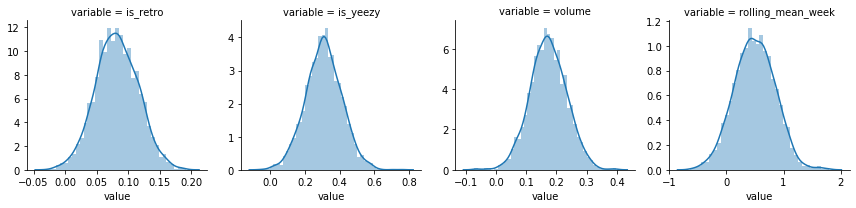

In [10]:
selected_features = ['volume', 'rolling_mean_week', 'is_retro', 'is_yeezy']
pl.visualize_weights(fit, test_features, selected_features)